In [5]:
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import os
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.misc import derivative
from operator import itemgetter

In [13]:
def func(w, t):
    V, m, h, n = w
    dm = lambda m, t, V: (0.1*(-V-48)/(np.exp((-V-48)/15)-1))*(1-m) - 0.12*(V+8)*m/(np.exp((V+8)/5)-1)
    dh = lambda h, t, V: 0.17*np.exp((-V-90)/20)*(1-h) - h/(np.exp((-V-42)/10)+1)
    dn = lambda n, t, V: (0.0001*(-V-50)/(np.exp((-V-50)/10)-1))*(1-n) - 0.002*np.exp((-V-90)/80)*n
    
    dV = lambda V, t, m, h, n: -((G_na1*(m**3)*h + G_na2)*(V - 40) 
                        + (G_k*np.exp((-V-90)/50)+0.015*np.exp((V+90)/60)+ G_k*n**4)*(V + 100) 
                        + G_an*(V+60))/12
    return np.array([dV(V,t,m,h,n),dm(m,t,V),dh(h,t,V),dn(n,t,V)])

## Kinetics kurve

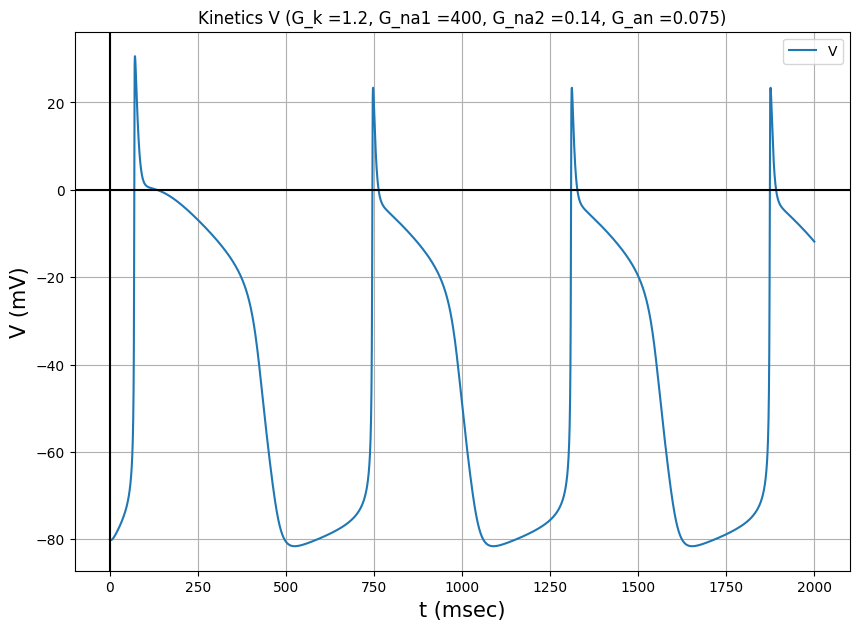

In [14]:
G_k = 1.2
G_na1 = 400
G_na2 = 0.14
G_an = 0.075

t = np.linspace(0, 2000, 10000)
sol = odeint(func, (-80,0.07,0.06,0.03), t)

fig = plt.figure(figsize = (10,7))
# ax = Axes3D(fig)

plt.plot(t, sol[:, 0], label = 'V')
# plt.plot(t, sol[:, 1], label = 'm')
# plt.plot(t, sol[:, 2], label = 'h')
# plt.plot(t, sol[:, 3], label = 'n')
plt.legend()
plt.xlabel('t (msec)', fontsize=15)
plt.ylabel('V (mV)', fontsize=15)
plt.axhline(0,color='black') 
plt.axvline(0,color='black')
plt.title(f'Kinetics V (G_k ={G_k}, G_na1 ={G_na1}, G_na2 ={G_na2}, G_an ={G_an})')
plt.grid()
plt.show()

## self-oscillations

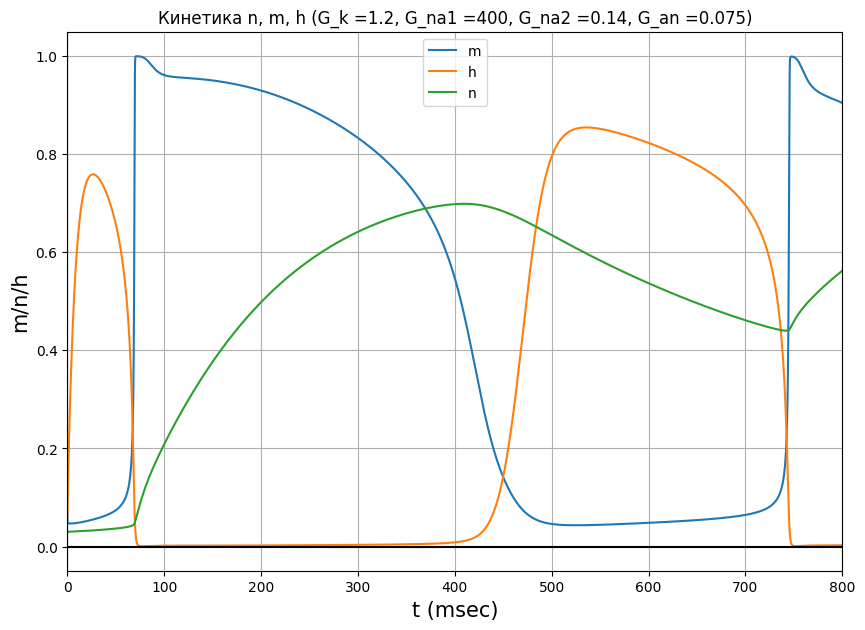

In [15]:
t = np.linspace(0, 2000, 10000)
sol = odeint(func, (-80,0.07,0.06,0.03), t)

fig = plt.figure(figsize = (10,7))
# ax = Axes3D(fig)

# plt.plot(t, sol[:, 0], label = 'V')
plt.plot(t, sol[:, 1], label = 'm')
plt.plot(t, sol[:, 2], label = 'h')
plt.plot(t, sol[:, 3], label = 'n')
plt.legend()

plt.xlabel('t (msec)', fontsize=15)
plt.ylabel('m/n/h', fontsize=15)

plt.axhline(0,color='black') 
plt.axvline(0,color='black')
plt.xlim(0, 800)
plt.title(f'Кинетика n, m, h (G_k ={G_k}, G_na1 ={G_na1}, G_na2 ={G_na2}, G_an ={G_an})')
plt.grid()
plt.show()

### 3D-view

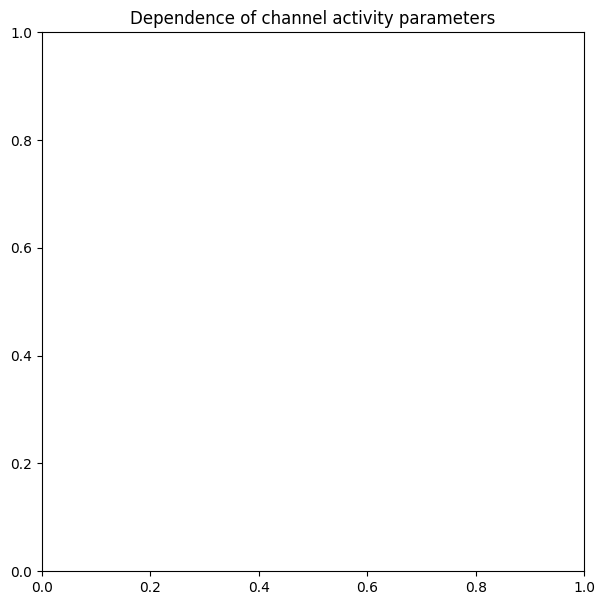

In [16]:
t = np.linspace(0, 4000, 10000)
sol = odeint(func, (-80,0.07,0.6,0.03), t)

fig = plt.figure(figsize = (7, 7))
ax = Axes3D(fig)
ax.plot(sol[:,3], sol[:,1], sol[:,2])

ax.set_xlabel('n', fontsize=15)
ax.set_ylabel('m', fontsize=15)
ax.set_zlabel('h', fontsize=15)
plt.title('Dependence of channel activity parameters')
plt.show()

#### Turn off channels:

In [17]:
def func_lock(w, t):
    V, m, h, n = w
    dm = lambda m, t, V: (0.1*(-V-48)/(np.exp((-V-48)/15)-1))*(1-m) - 0.12*(V+8)*m/(np.exp((V+8)/5)-1)
    dh = lambda h, t, V: 0.17*np.exp((-V-90)/20)*(1-h) - h/(np.exp((-V-42)/10)+1)
    dn = lambda n, t, V: (0.0001*(-V-50)/(np.exp((-V-50)/10)-1))*(1-n) - 0.002*np.exp((-V-90)/80)*n
    
    dV = lambda V, t, m, h, n: -(lockNA*(G_na1*(m**3)*h + G_na2)*(V - 40) 
                        + (lockK1*(G_k*np.exp((-V-90)/50)+0.015*np.exp((V+90)/60))+ lockK2*G_k*n**4)*(V + 100) 
                        + lockleak*G_an*(V+60))/12
    return np.array([dV(V,t,m,h,n),dm(m,t,V),dh(h,t,V),dn(n,t,V)])

G_k = 1.2
G_na1 = 400
G_na2 = 0.14
G_an = 0.075

1- Ina = 0: (Na ions do not enter, the potential does not change)

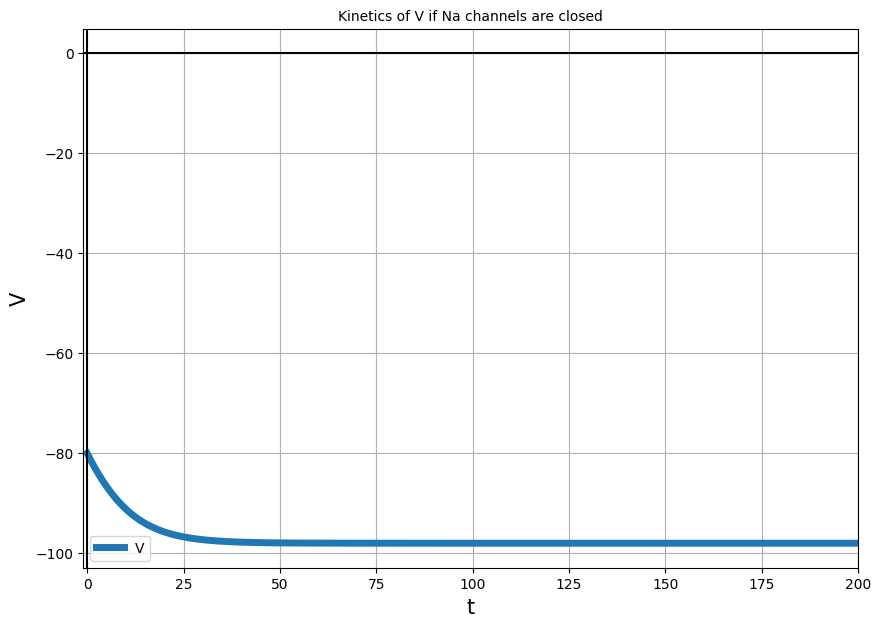

In [19]:
lockNA = 0
lockK1 = 1
lockK2  = 1
lockleak = 1

t = np.linspace(0, 2000, 10000)
sol = odeint(func_lock, (-80,0.07,0.06,0.03), t)

fig = plt.figure(figsize = (10,7))

plt.plot(t, sol[:, 0], label = 'V', linewidth=5)
# plt.plot(t, sol[:, 1], label = 'm')
# plt.plot(t, sol[:, 2], label = 'h')
# plt.plot(t, sol[:, 3], label = 'n')
plt.legend()
plt.xlabel('t', fontsize=15)
plt.ylabel('V', fontsize=15)
plt.axhline(0,color='black') 
plt.axvline(0,color='black')
plt.xlim(-1, 200)
plt.title('Kinetics of V if Na channels are closed', fontsize=10)
plt.grid()
plt.show()

2- Ik1 = 0: 

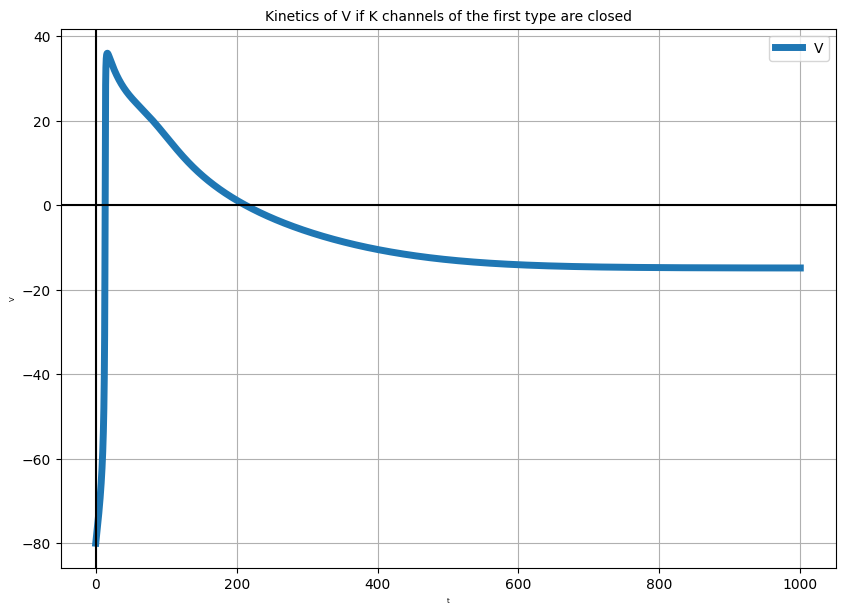

In [20]:
lockNA = 1
lockK1 = 0
lockK2  = 1
lockleak = 1
t = np.linspace(0, 1000, 10000)
sol = odeint(func_lock, (-80,0.07,0.06,0.03), t)

fig = plt.figure(figsize = (10,7))
# ax = Axes3D(fig)

plt.plot(t, sol[:, 0], label = 'V', linewidth=5)
# plt.plot(t, sol[:, 1], label = 'm')
# plt.plot(t, sol[:, 2], label = 'h')
# plt.plot(t, sol[:, 3], label = 'n')
plt.legend()
plt.xlabel('t', fontsize=5)
plt.ylabel('V', fontsize=5)
plt.axhline(0,color='black') 
plt.axvline(0,color='black')
plt.title('Kinetics of V if K channels of the first type are closed', fontsize=10)
plt.grid()
plt.show()

3- Ik2 = 0:

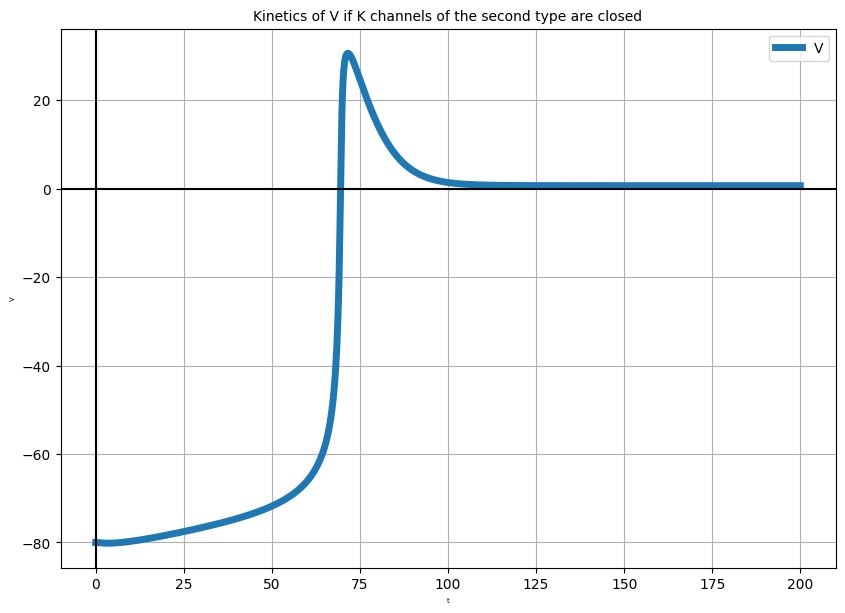

In [21]:
lockNA = 1
lockK1 = 1
lockK2  = 0
lockleak = 1
t = np.linspace(0, 200, 10000)
sol = odeint(func_lock, (-80,0.07,0.06,0.03), t)

fig = plt.figure(figsize = (10,7))
# ax = Axes3D(fig)

plt.plot(t, sol[:, 0], label = 'V', linewidth=5)
# plt.plot(t, sol[:, 1], label = 'm')
# plt.plot(t, sol[:, 2], label = 'h')
# plt.plot(t, sol[:, 3], label = 'n')
plt.legend()
plt.xlabel('t', fontsize=5)
plt.ylabel('V', fontsize=5)
plt.axhline(0,color='black') 
plt.axvline(0,color='black')
plt.title('Kinetics of V if K channels of the second type are closed', fontsize=10)
plt.grid()
plt.show()

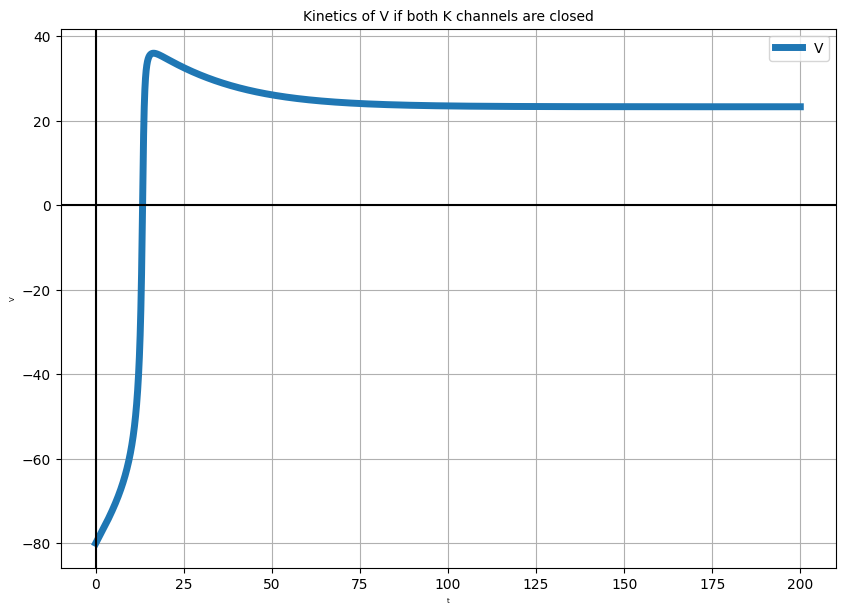

In [22]:
lockNA = 1
lockK1 = 0
lockK2  = 0
lockleak = 1
t = np.linspace(0, 200, 10000)
sol = odeint(func_lock, (-80,0.07,0.06,0.03), t)

fig = plt.figure(figsize = (10,7))
# ax = Axes3D(fig)

plt.plot(t, sol[:, 0], label = 'V', linewidth=5)
# plt.plot(t, sol[:, 1], label = 'm')
# plt.plot(t, sol[:, 2], label = 'h')
# plt.plot(t, sol[:, 3], label = 'n')
plt.legend()
plt.xlabel('t', fontsize=5)
plt.ylabel('V', fontsize=5)
plt.axhline(0,color='black') 
plt.axvline(0,color='black')
plt.title('Kinetics of V if both K channels are closed', fontsize=10)
plt.grid()
plt.show()

4- I_leak = 0:

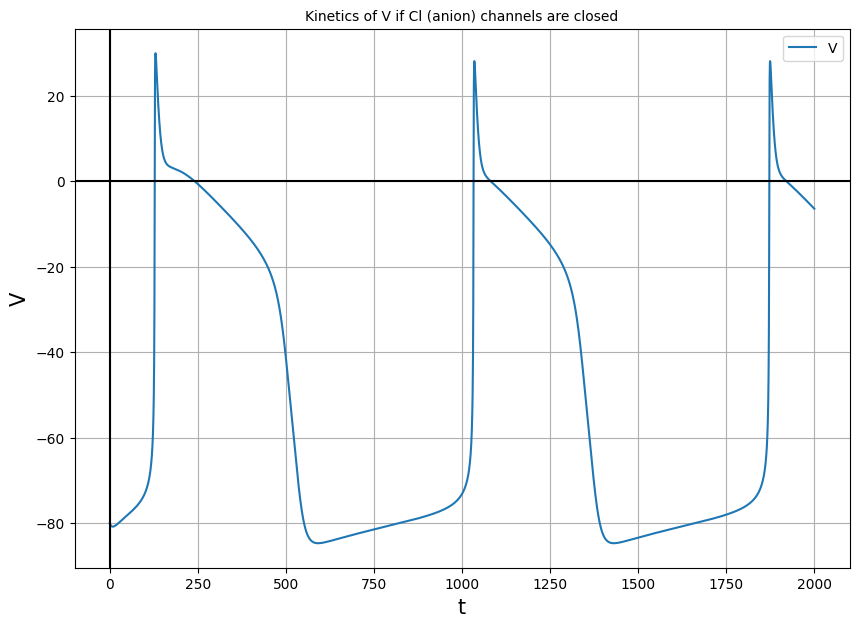

In [24]:
lockNA = 1
lockK1 = 1
lockK2  = 1
lockleak = 0

t = np.linspace(0, 2000, 10000)
sol = odeint(func_lock, (-80,0.07,0.06,0.03), t)

fig = plt.figure(figsize = (10,7))

plt.plot(t, sol[:, 0], label = 'V')
# plt.plot(t, sol[:, 1], label = 'm')
# plt.plot(t, sol[:, 2], label = 'h')
# plt.plot(t, sol[:, 3], label = 'n')
plt.legend()
plt.xlabel('t', fontsize=15)
plt.ylabel('V', fontsize=15)
plt.axhline(0,color='black') 
plt.axvline(0,color='black')
plt.title('Kinetics of V if Cl (anion) channels are closed', fontsize=10)
plt.grid()
plt.show()

#### Simplify the model by replacing m and h with values in the steady state (when their derivative is zero)
find stationary points


In [25]:
Am = lambda V: 0.1*(-V-48)/(np.exp((-V-48)/15)-1)
Bm = lambda V: 0.12*(V+8)/(np.exp((V+8)/5)-1)
m_steady = lambda V: Am(V)/(Am(V)+Bm(V))

Ah = lambda V: 0.17*np.exp((-V-90)/20)
Bh = lambda V: 1/(np.exp((-V-42)/10)+1)
h_steady = lambda V: Ah(V)/(Ah(V)+Bh(V))

An = lambda V:  0.0001*(-V-50)/(np.exp((-V-50)/10)-1)
Bn = lambda V:  0.002*np.exp((-V-90)/80)
n_steady = lambda V: An(V)/(An(V)+Bn(V))

F = lambda V: -1*((400*(m_steady(V)**3)*h_steady(V) + 0.14)*(V - 40) 
                        + (1.4*np.exp((-V-90)/50)+0.015*np.exp((V+90)/60)+ 1.4*n_steady(V)**4)*(V + 100) 
                        +0.4*(V+60))

Text(0, 0.5, 'V')

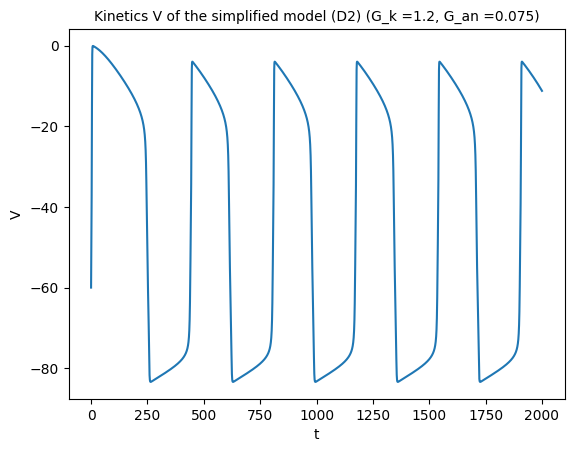

In [27]:
# Differences in the kinetics of the simplified model
# simple model 
G_k = 1.2
G_an = 0.075
G_na1 = 400
G_na2 = 0.14
dV_simple = lambda n, V: -1*((G_na1*(m_steady(V)**3)*h_steady(V) + G_na2)*(V - 40) 
                        + (G_k*np.exp((-V-90)/50)+0.015*np.exp((V+90)/60)+ G_k*n**4)*(V + 100) 
                        +G_an*(V+60))

dn = lambda n, V: (0.0001*(-V-50)/(np.exp((-V-50)/10)-1))*(1-n) - 0.002*np.exp((-V-90)/80)*n

def fun(w, t):
    V, n = w
    return np.array([dV_simple(n,V),dn(n,V)])
    
t = np.linspace(0,2000, 10000)
sol = odeint(fun, (-60,0.3), t)
plt.plot(t, sol[:, 0])
plt.title(f'Kinetics V of the simplified model (D2) (G_k ={G_k}, G_an ={G_an})', fontsize=10)
plt.xlabel('t')
plt.ylabel('V')

Text(0.5, 1.0, 'Dependence of V on n in the simplified Noble model, при G_k = 1.2, G_an = 0.075')

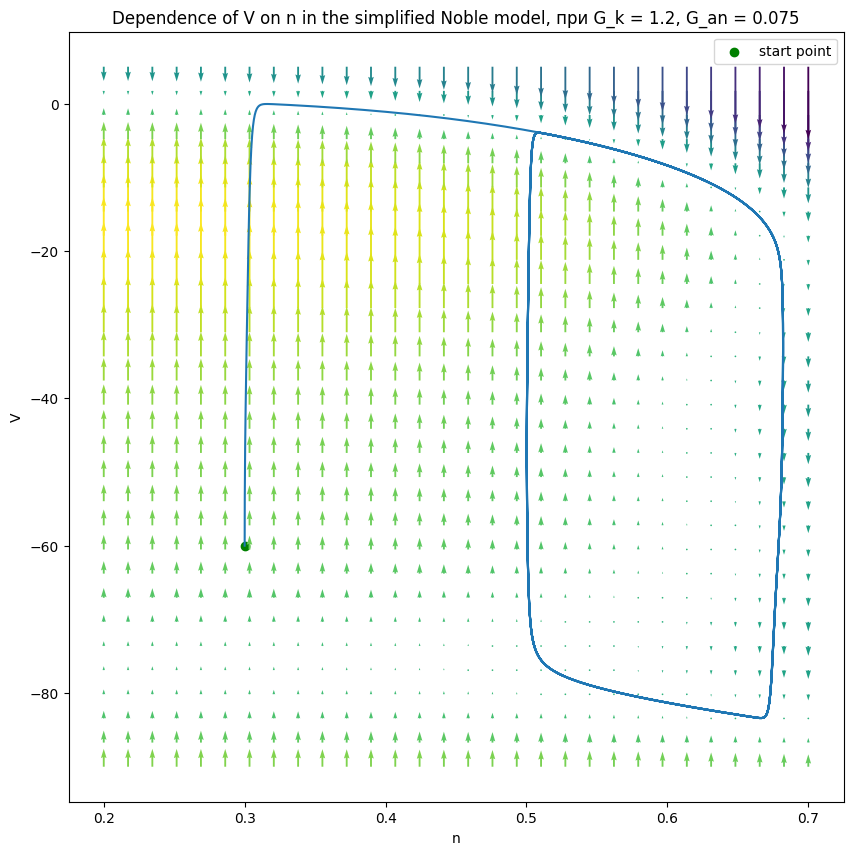

In [29]:
# force field of the simplified model
plt.figure(figsize = (10,10))

plt.scatter(sol[0, 1], sol[0, 0], color = 'g', label = 'start point')
plt.legend()

plt.plot(sol[:, 1], sol[:, 0])
nn = np.linspace(0.2,0.7,30)
vv = np.linspace(-90, 5, 30)

Vm, Nm  = np.meshgrid(vv, nn)

Vs = dV_simple(Nm, Vm)
Ns = dn(Nm, Vm)

n = -20
color = (Vs + Ns)

plt.quiver(Nm,Vm, Ns, Vs, color)
plt.xlabel('n')
plt.ylabel('V')
plt.title(f'Dependence of V on n in the simplified Noble model, при G_k = {G_k}, G_an = {G_an}')

Text(0, 0.5, 'V')

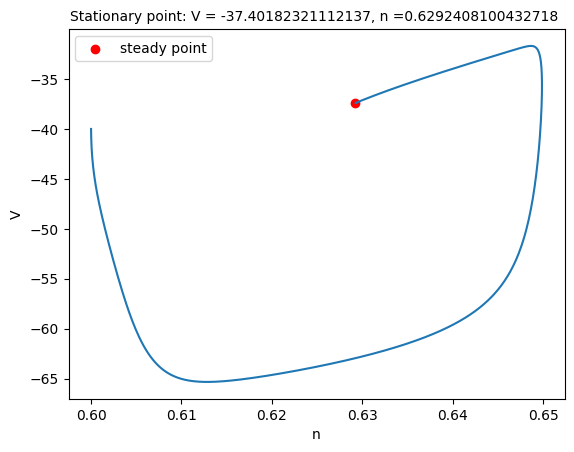

In [32]:
#Since we have a limit cycle, we find the stationary point of the cycle V from n by going backwards
G_k = 1.2
G_an = 0.075
G_na1 = 400
G_na2 = 0.14
dV_simple = lambda n, V: -1*((G_na1*(m_steady(V)**3)*h_steady(V) + G_na2)*(V - 40) 
                        + (G_k*np.exp((-V-90)/50)+0.015*np.exp((V+90)/60)+ G_k*n**4)*(V + 100) 
                        +G_an*(V+60))

dn = lambda n, V: (0.0001*(-V-50)/(np.exp((-V-50)/10)-1))*(1-n) - 0.002*np.exp((-V-90)/80)*n

def fun(w, t):
    V, n = w
    return np.array([dV_simple(n,V),dn(n,V)])
    
t = np.linspace(2000,0, 10000)
sol = odeint(fun, (-40,0.6), t)
plt.plot(sol[:, 1], sol[:, 0])
plt.scatter(sol[-1, 1], sol[-1, 0], color = 'r', label = 'steady point')
plt.legend()
plt.title(f'Stationary point: V = {sol[-1, 0]}, n ={sol[-1, 1]} ', fontsize=10)
plt.xlabel('n')
plt.ylabel('V')

In [33]:
# # 
# G_k = 1.2
# G_an = 0.075

# def pot(w):
#     V, n = fun(w, t = 1)
#     return V**2 + n**2

# tt=np.linspace(0, 10000, 10000)
# zz=odeint(fun, (-80,0.03), tt)
# loc_min = minimize(pot, zz[-1])



# print("Stationary point", loc_min.x)

Birth and death of self-oscillations

Text(0, 0.5, 'V')

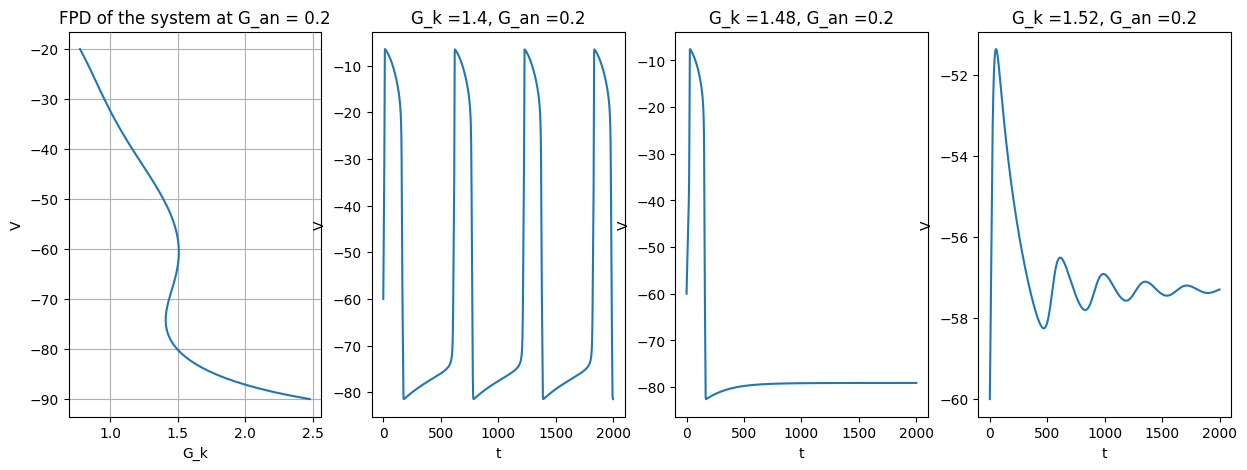

In [33]:
# FOP V on parameter Gk
# State when auto-oscillations are possible
fig = plt.figure(figsize = (15,5))
fig.add_subplot(1,4,1)
Gan = 0.2
Gk_func = lambda V: -1*((400*(m_steady(V)**3)*h_steady(V) + 0.14)*(V - 40) +Gan*(V+60))/((np.exp((-V-90)/50)+0.015*np.exp((V+90)/60)+ n_steady(V)**4)*(V + 100)) 

Vs = np.linspace(-90, -20, 100)
Gks = [Gk_func(V) for V in Vs]

plt.plot(Gks, Vs)
# plt.legend()
plt.grid()
plt.xlabel('G_k')
plt.ylabel('V')
plt.title(f'FPD of the system at G_an = {Gan}')

fig.add_subplot(1,4,2)
G_k = 1.4
G_an = 0.2
G_na1 = 400
G_na2 = 0.14
dV_simple = lambda n, V: -1*((G_na1*(m_steady(V)**3)*h_steady(V) + G_na2)*(V - 40) 
                        + (G_k*np.exp((-V-90)/50)+0.015*np.exp((V+90)/60)+ G_k*n**4)*(V + 100) 
                        +G_an*(V+60))

dn = lambda n, V: (0.0001*(-V-50)/(np.exp((-V-50)/10)-1))*(1-n) - 0.002*np.exp((-V-90)/80)*n

def fun(w, t):
    V, n = w
    return np.array([dV_simple(n,V),dn(n,V)])
    
t = np.linspace(0,2000, 10000)
sol = odeint(fun, (-60,0.3), t)
plt.plot(t, sol[:, 0])
plt.title(f'G_k ={G_k}, G_an ={G_an}')
plt.xlabel('t')
plt.ylabel('V')

fig.add_subplot(1,4,3)
G_k = 1.48
G_an = 0.2
G_na1 = 400
G_na2 = 0.14

sol = odeint(fun, (-60,0.3), t)
plt.plot(t, sol[:, 0])
plt.title(f'G_k ={G_k}, G_an ={G_an}')
plt.xlabel('t')
plt.ylabel('V')

fig.add_subplot(1,4,4)
G_k = 1.52
G_an = 0.2
G_na1 = 400
G_na2 = 0.14

sol = odeint(fun, (-60,0.3), t)
plt.plot(t, sol[:, 0])
plt.title(f'G_k ={G_k}, G_an ={G_an}')
plt.xlabel('t')
plt.ylabel('V')

Text(0, 0.5, 'V')

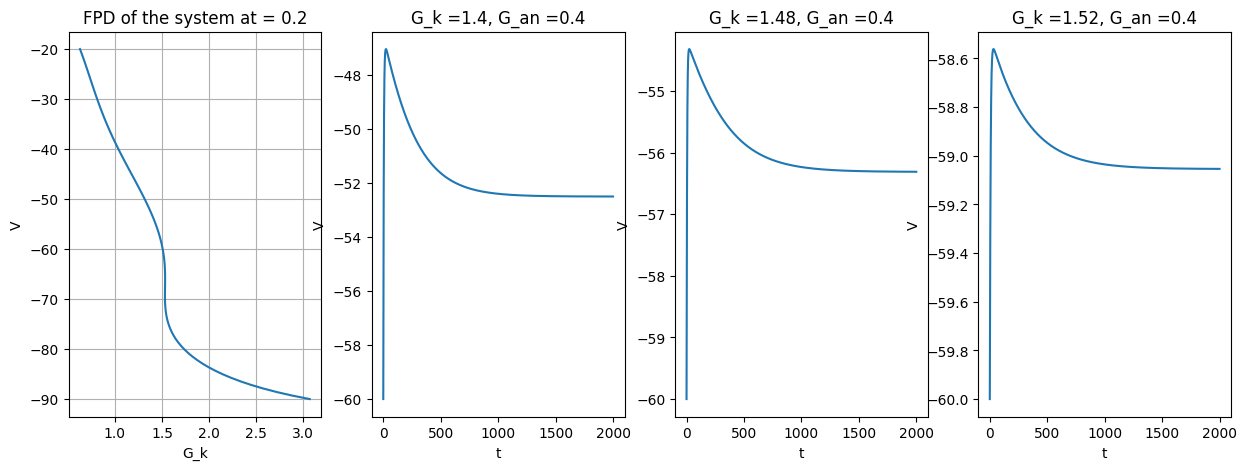

In [35]:
# FOP V from parameter Gk
# State when auto-oscillations are not possible
fig = plt.figure(figsize = (15,5))
fig.add_subplot(1,4,1)
G_an = 0.4
Gk_func = lambda V: -1*((400*(m_steady(V)**3)*h_steady(V) + 0.14)*(V - 40) +G_an*(V+60))/((np.exp((-V-90)/50)+0.015*np.exp((V+90)/60)+ n_steady(V)**4)*(V + 100)) 

Vs = np.linspace(-90, -20, 100)
Gks = [Gk_func(V) for V in Vs]

plt.plot(Gks, Vs)
# plt.legend()
plt.grid()
plt.xlabel('G_k')
plt.ylabel('V')
plt.title(f'FPD of the system at = {Gan}')

fig.add_subplot(1,4,2)
G_k = 1.4
# G_an = 0.2
G_na1 = 400
G_na2 = 0.14
dV_simple = lambda n, V: -1*((G_na1*(m_steady(V)**3)*h_steady(V) + G_na2)*(V - 40) 
                        + (G_k*np.exp((-V-90)/50)+0.015*np.exp((V+90)/60)+ G_k*n**4)*(V + 100) 
                        +G_an*(V+60))

dn = lambda n, V: (0.0001*(-V-50)/(np.exp((-V-50)/10)-1))*(1-n) - 0.002*np.exp((-V-90)/80)*n

def fun(w, t):
    V, n = w
    return np.array([dV_simple(n,V),dn(n,V)])
    
t = np.linspace(0,2000, 10000)
sol = odeint(fun, (-60,0.3), t)
plt.plot(t, sol[:, 0])
plt.title(f'G_k ={G_k}, G_an ={G_an}')
plt.xlabel('t')
plt.ylabel('V')

fig.add_subplot(1,4,3)
G_k = 1.48
# G_an = 0.2
G_na1 = 400
G_na2 = 0.14

sol = odeint(fun, (-60,0.3), t)
plt.plot(t, sol[:, 0])
plt.title(f'G_k ={G_k}, G_an ={G_an}')
plt.xlabel('t')
plt.ylabel('V')

fig.add_subplot(1,4,4)
G_k = 1.52
# G_an = 0.2
G_na1 = 400
G_na2 = 0.14

sol = odeint(fun, (-60,0.3), t)
plt.plot(t, sol[:, 0])
plt.title(f'G_k ={G_k}, G_an ={G_an}')
plt.xlabel('t')
plt.ylabel('V')